>## **Q1)Download Haberman Cancer Survival dataset from Kaggle.**## 

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cheching data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv')

print(data.head(10))

   Age  Op_year  axil_nodes  Surv_status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1
5   33       58          10            1
6   33       60           0            1
7   34       59           0            2
8   34       66           9            2
9   34       58          30            1


In [ ]:
data.describe()

,Age,Op_year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


>## **Q2)Mention High level statistics of the dataset: number of points, number of features, number of classes, data-points per class.bold text**##

In [ ]:
# Number of Points
print(data.shape)

(305, 4)


In [ ]:
data["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
# Class Label 1 -> yes, 2 -> No
data['Surv_status'] = data['Surv_status'].map({1:"yes", 2:"no"})
print(data.head(15)) 

    Age  Op_year  axil_nodes Surv_status
0    30       64           1         yes
1    30       62           3         yes
2    30       65           0         yes
3    31       59           2         yes
4    31       65           4         yes
5    33       58          10         yes
6    33       60           0         yes
7    34       59           0          no
8    34       66           9          no
9    34       58          30         yes
10   34       60           1         yes
11   34       61          10         yes
12   34       67           7         yes
13   34       60           0         yes
14   35       64          13         yes


In [ ]:
# CHECKING THE UPDATED SURVIVAL STATUS
data["Surv_status"].value_counts()

yes    225
no      81
Name: Surv_status, dtype: int64

In [ ]:
# CHECKING THE UPDATED INFO ABOUT THE CHANGED DATATYPE OF OUR CLASS LABEL
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          306 non-null    int64 
 1   Op_year      306 non-null    int64 
 2   axil_nodes   306 non-null    int64 
 3   Surv_status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [ ]:
# Number of Features
print (data.columns)

Index(['Age', 'Op_year', 'axil_nodes', 'Surv_status'], dtype='object')


In [ ]:
# Last column is our CATEGORY that is the DEPENDENT VARIABLE, therefore it is not considered as a feature
print (data.columns[:-1])

Index(['Age', 'Op_year', 'axil_nodes'], dtype='object')


In [ ]:
# Number of Classes
print(data["Surv_status"].unique())

['yes' 'no']


In [ ]:
# Datapoints per Number of class
print(data.groupby("Surv_status").count())

             Age  Op_year  axil_nodes
Surv_status                          
no            81       81          81
yes          225      225         225


# ***Objective :-***
>To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes.

>## **Q4)Perform Univariate analysis (PDF, CDF, Boxplot, Violin plots) to understand which features are useful towards classification.**

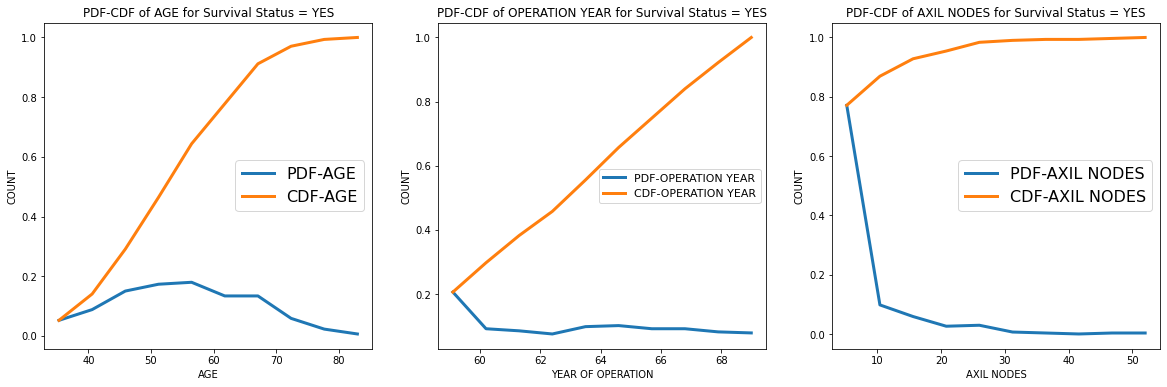

In [ ]:
#PDF and CDF
plt.figure(figsize=(20,6))
plt.subplot(131) ##(1=no. of rows, 3= no. of columns, 1=1st figure,2,3,4 boxes)
counts,bin_edges=np.histogram(data["Age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AGE')
plt.title('PDF-CDF of AGE for Survival Status = YES')
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 16})

plt.subplot(132)
counts,bin_edges=np.histogram(data["Op_year"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('YEAR OF OPERATION')
plt.title('PDF-CDF of OPERATION YEAR for Survival Status = YES')
plt.legend(['PDF-OPERATION YEAR', 'CDF-OPERATION YEAR'], loc = 5,prop={'size': 11})

plt.subplot(133)
counts,bin_edges=np.histogram(data["axil_nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AXIL NODES')
plt.title('PDF-CDF of AXIL NODES for Survival Status = YES')
plt.legend(['PDF-AXIL NODES', 'CDF-AXIL NODES'], loc = 5,prop={'size': 16})
plt.show()

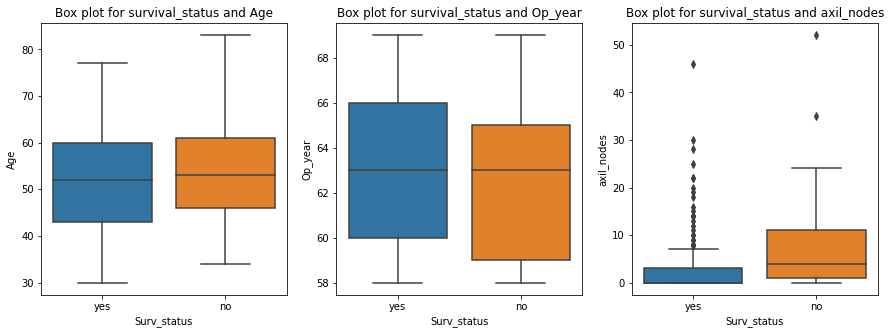

In [ ]:
# Box Plot & Whiskers
figure, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    mystr="Box plot for survival_status and "+feature
    sns.boxplot( x='Surv_status', y=feature, data=data, ax=axes[idx]).set_title(mystr)
plt.show()

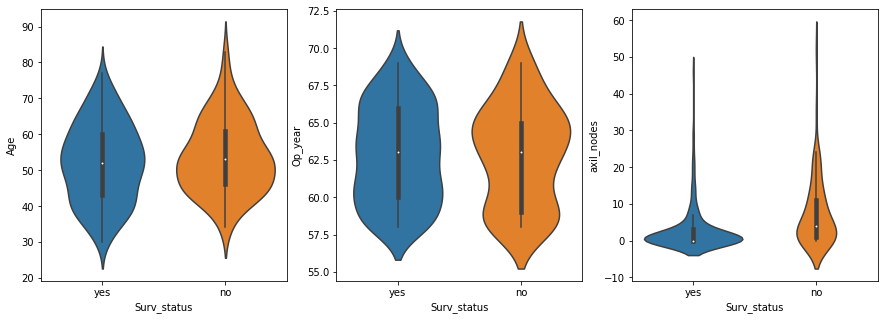

In [ ]:
# Violin Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.violinplot( x='Surv_status', y=feature, data=data, ax=axes[idx])
plt.show()

>## **Q5)Perform Bi-variate analysis (scatter plots, pair-plots) to see ifcombinations of features are useful in classification.**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


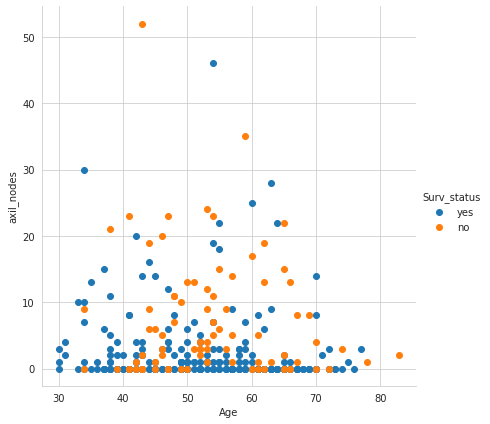

In [ ]:
# Bivariate Analysis
## Scatter Plot
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="Surv_status", size=6) \
   .map(plt.scatter, "Age", "axil_nodes") \
   .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


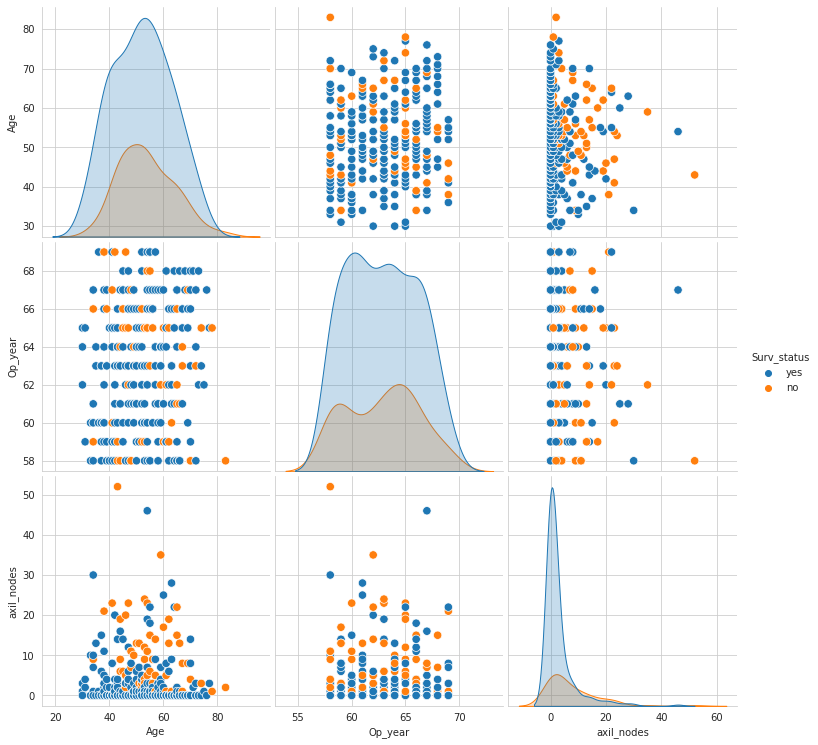

In [ ]:
#Pair Plot
sns.set_style("whitegrid")
sns.pairplot(data,hue="Surv_status",vars=["Age","Op_year","axil_nodes"],size=3.5,plot_kws=dict(s=70),diag_kind = 'kde')
plt.show()

# ***Conclusion :-***
> 1. Dataset is UNBALANCED but complete as no values are missing
>2. Our CLASS LABEL ie status is INTERGER and needs to converted to valid CATEGORICAL datatype
>3. Class Label "status" are now to labelled as {1:"yes",2:"no"} stating "yes" as survived and "no" as Dead, Not Survived.
>4. This is Binary Classification Problem, where we need to predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes
>5. 50% of the Patients are below the age of 54.
>6. Operation year having range (63-66) had highest successfull survival rate
>7. Operation year 60 had highest un-successfull rate. Patients with age range
40-60 have survived the most.
>8. As we can clearly see, axil node=0 has the highest Survival rate.
>9. From NODE and STATUS, we can conclude that higher the nodes, higher the
chances of their death.
>10. As we can see all the above Pair Plots, we can say that they are not Linearly
Separable.
>11. Patients with Age < 40 and axil < 30 have higher chances of survival.
>12. Patients with Age > 50 and Axil > 10 are more likely to die
>13. People with axil nodes more than 50 have higher rate of non survival.
>14. Operation year 60, 61 and 68 has more survival rate.